In [7]:
from dolfin import *
from mshr import *

In [8]:
# Create mesh
rectangle1 = Rectangle(Point(-2., -2.), Point(0., 2.))
rectangle2 = Rectangle(Point(0., -2.), Point(2., 0.))
circle1 = Circle(Point(0., 0.), 2.0, segments=32)
circle2 = Circle(Point(0., 0.), 1.0, segments=32)
domain = circle1 - circle2 - rectangle1 - rectangle2
domain.set_subdomain(1, domain)
mesh = generate_mesh(domain, 22)

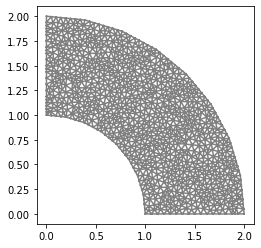

In [9]:
plot(mesh)

In [10]:
# Create subdomains
subdomains = MeshFunction("size_t", mesh, 2, mesh.domains())

In [11]:
# Create boundaries
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[0], 0)


class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], 0)


class Inner(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and sqrt(x[0]**2 + x[1]**2) <= 1.0


class Outer(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and sqrt(x[0]**2 + x[1]**2) >= 2.0


boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
bottom = Bottom()
bottom.mark(boundaries, 1)
left = Left()
left.mark(boundaries, 3)
inner = Inner()
inner.mark(boundaries, 4)
outer = Outer()
outer.mark(boundaries, 2)

In [12]:
# Save
File("arch_test.xml") << mesh
File("arch_test_physical_region.xml") << subdomains
File("arch_test_facet_region.xml") << boundaries
# XDMFFile("unit_square.xdmf").write(mesh)
# XDMFFile("unit_square_physical_region.xdmf").write(subdomains)
# XDMFFile("unit_square_facet_region.xdmf").write(boundaries)